# Traitement des données G353 TP+7m+12m N2H+ coninuum substracted

In [1]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


***
# Verification des données enregistré

In [2]:
im_g = np.load("/user/workdir/soldanof/data/G353f_contsub/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f_contsub/coh.npy")

Text(0.5, 1.0, 'Coherent')

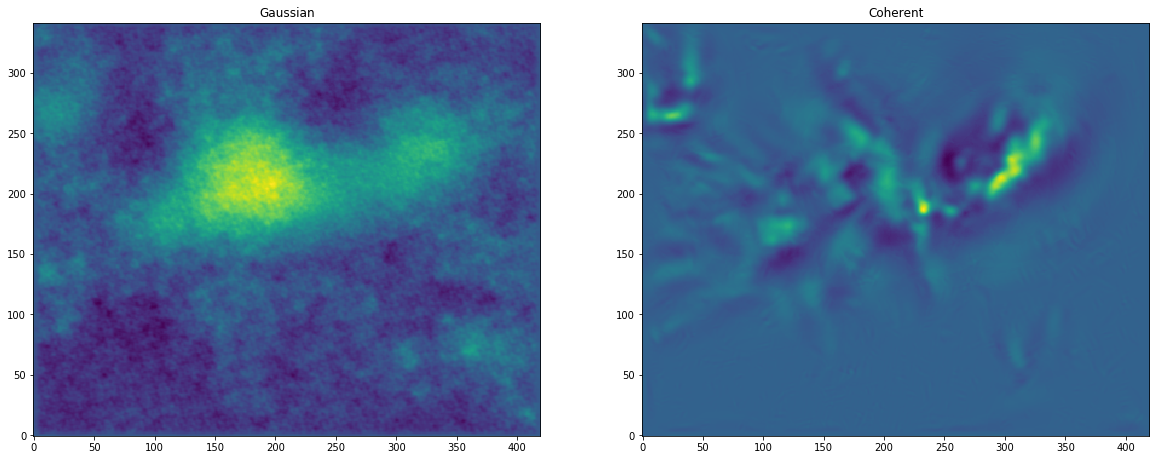

In [3]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[50].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[50].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

Text(0.5, 1.0, 'canal 100')

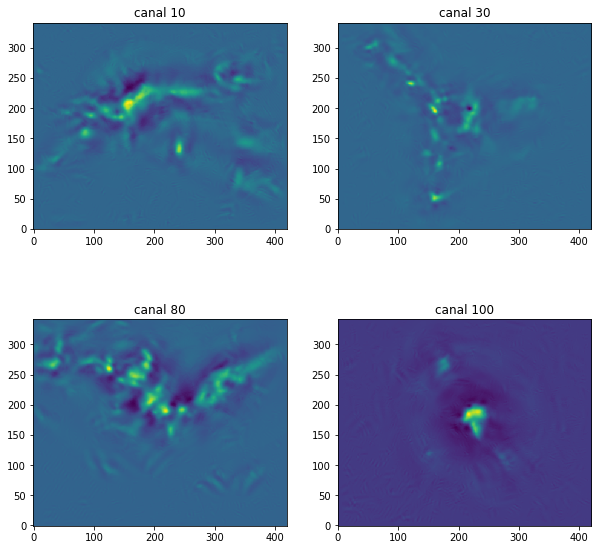

In [4]:
figure(figsize=(10,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

subplot(2,2,3)
imshow(im_ng[80].real,origin="lower")
title('canal 80')

subplot(2,2,4)
imshow(im_ng[100].real,origin="lower")
title('canal 100')

***
# Transformation des données en fichier fits

In [29]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_n2hp_feathered_contsub_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [19]:
fits.writeto("/user/workdir/soldanof/data/G353f_contsub/ng.fits",im_ng.real, header) 

In [20]:
fits.writeto("/user/workdir/soldanof/data/G353f_contsub/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -1.349e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.601e-01 [aplpy.core]


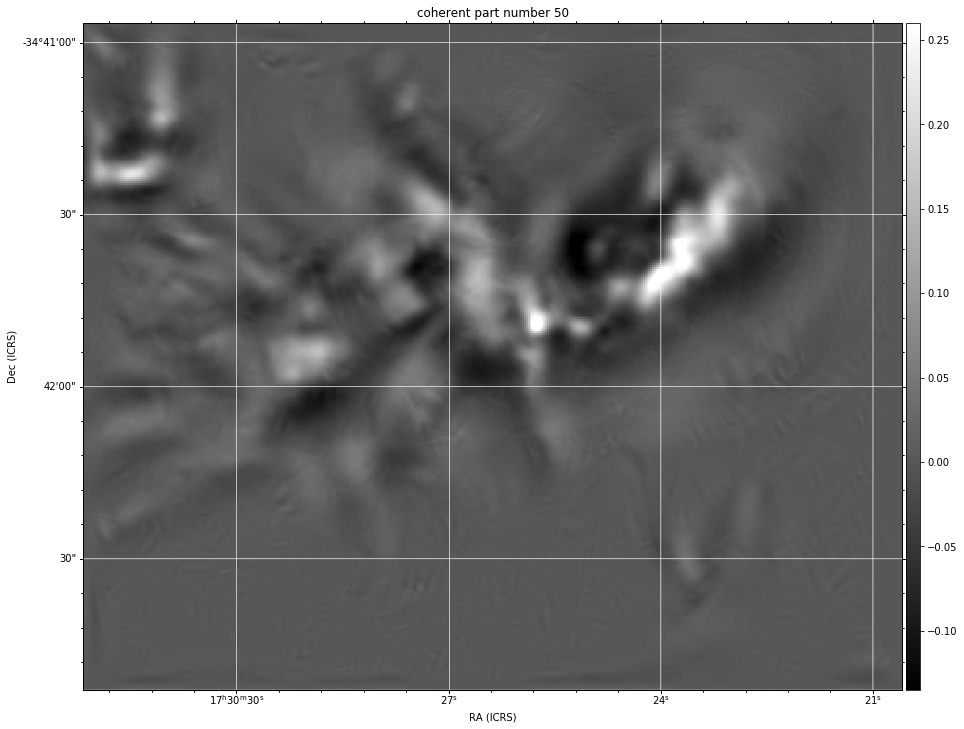

In [21]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 50
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_contsub/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -1.129e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.490e-01 [aplpy.core]


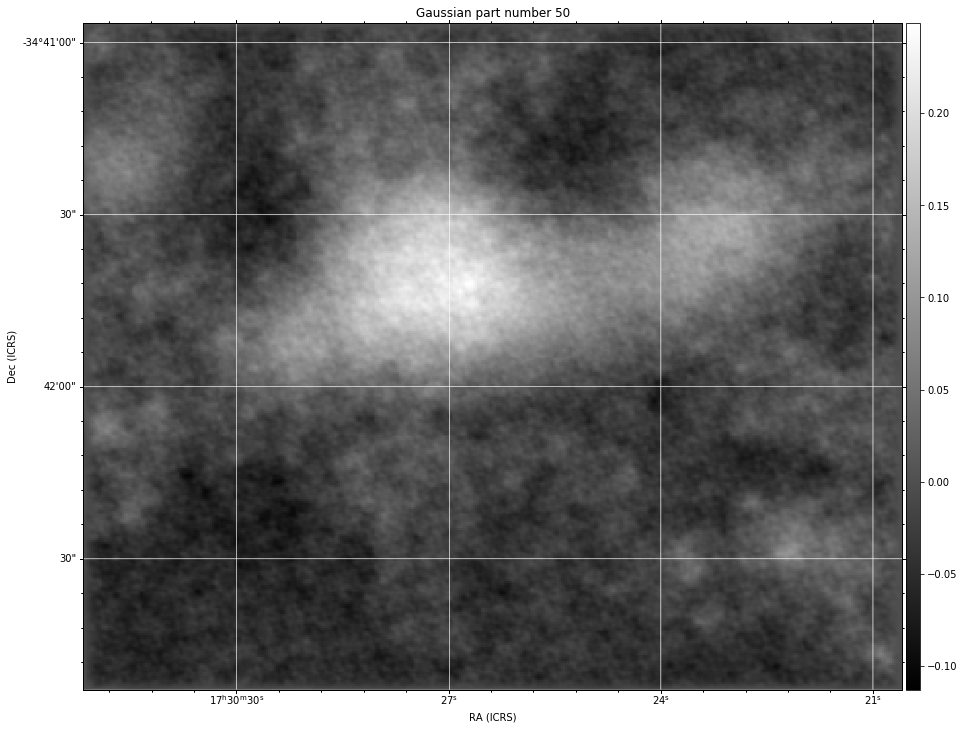

In [22]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_contsub/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
# creation carte intégré (moment 0)

In [13]:
im_ng.shape

(110, 342, 420)

In [14]:
im_ng_int = np.sum(im_ng,axis=0)

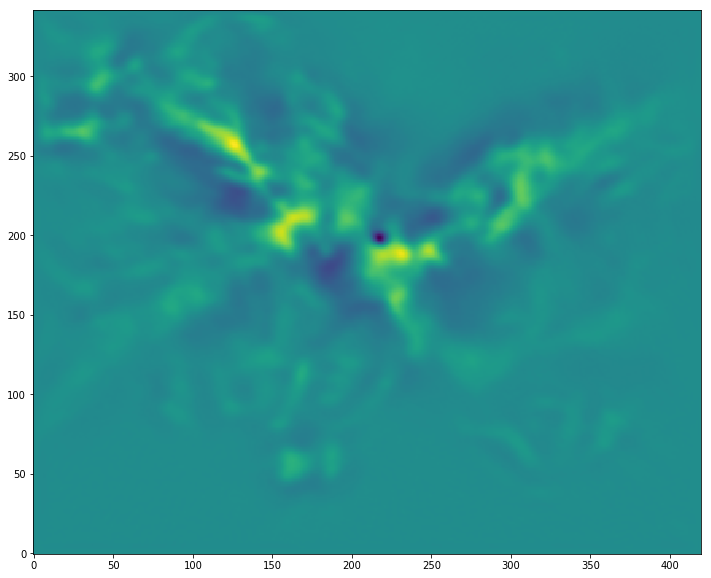

In [15]:
figure(figsize=(20,10))
imshow(im_ng_int.real,origin="lower")

In [23]:
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 original cube')

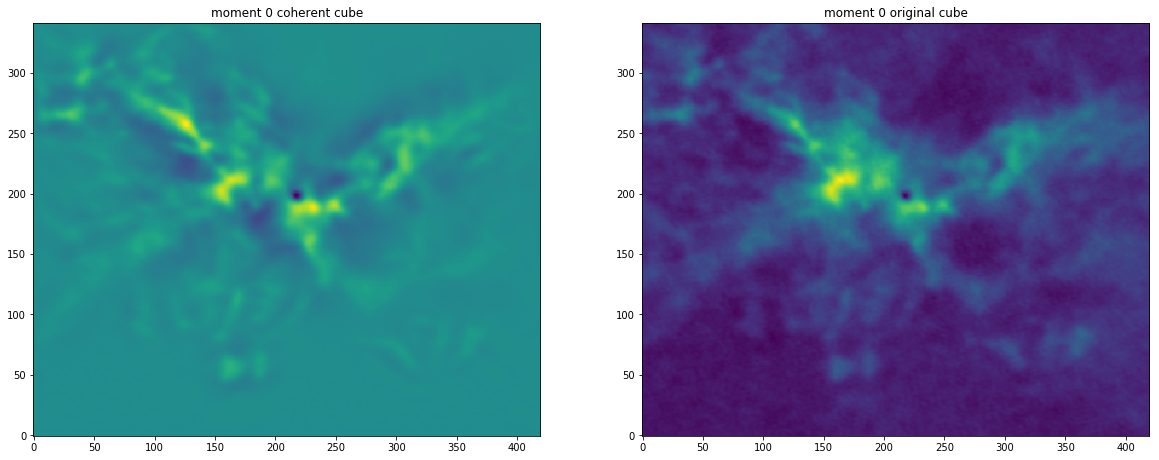

In [24]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent cube')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 original cube') 

In [25]:
del header['NAXIS3']
del header['PC3_1']
del header['PC3_2']
del header['PC1_3']
del header['PC2_3']
del header['PC3_3']
del header['CTYPE3']
del header['CRVAL3']
del header['CDELT3']
del header['CRPIX3']
del header['CUNIT3']

In [26]:
header['NAXIS']=2
fits.writeto("/user/workdir/soldanof/data/G353f_contsub/ng_t.fits",im_ng_int.real, header,overwrite= True) 

***

INFO: Auto-setting vmin to -1.967e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.339e+01 [aplpy.core]
INFO: Auto-setting vmin to -5.577e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.828e+00 [aplpy.core]


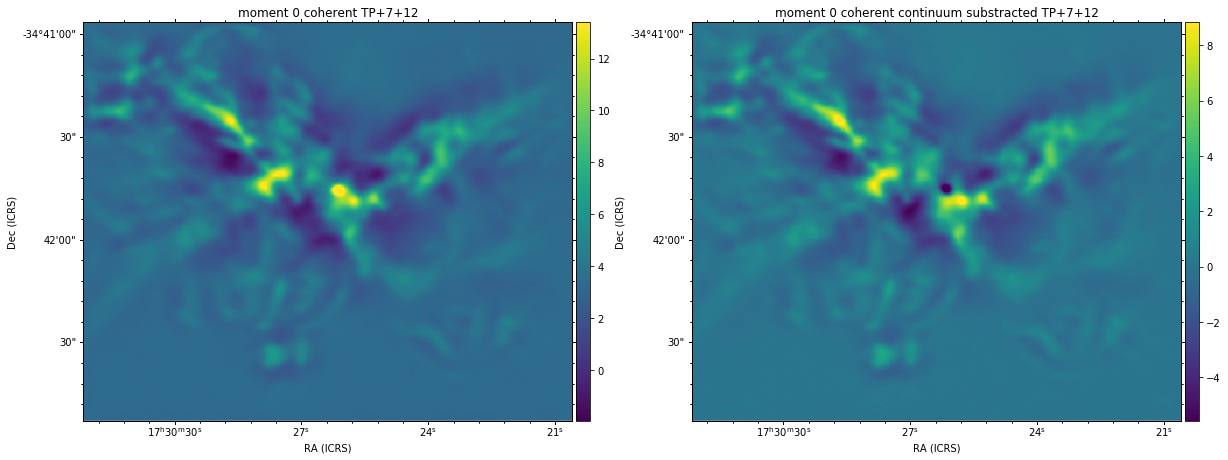

In [2]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/ng_t.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent TP+7+12")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_contsub/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent continuum substracted TP+7+12")

***
# Traitement des donnée du spectre de puissance

In [3]:
t = np.load("/user/workdir/soldanof/data/G353f_contsub/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353f_contsub/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353f_contsub/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/G353f_contsub/wave_k.npy")

Fonction de trace du spectre de puissance

In [4]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('P(k)')
    plt.xlabel('k (arcmin$^{-1}$)')
    plt.title('canal number {}'.format(n))
    plt.legend()

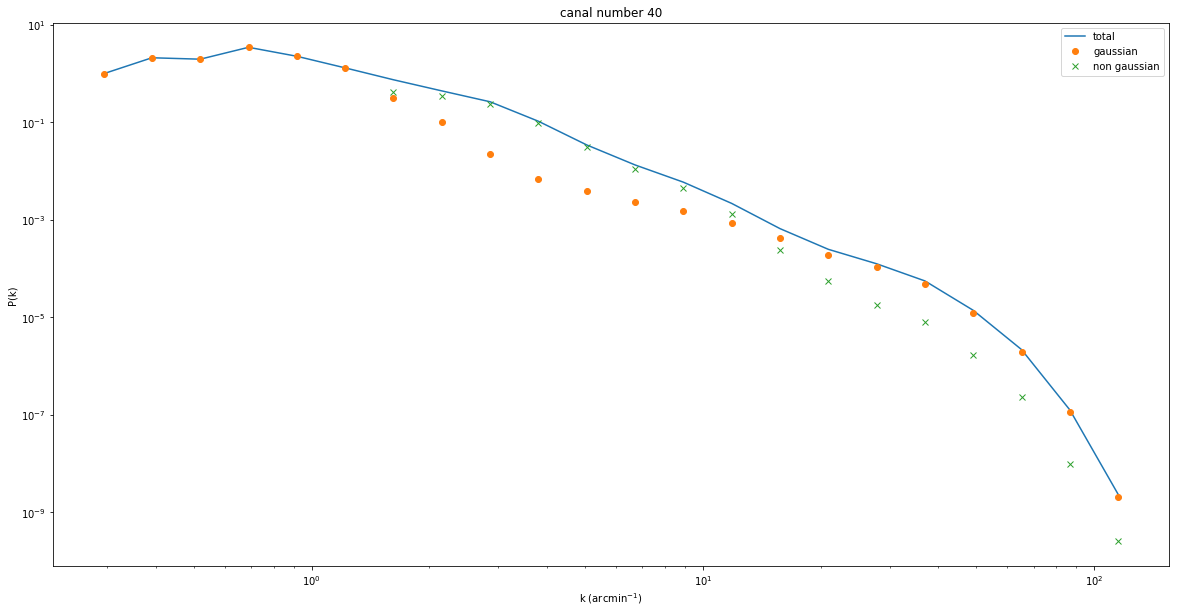

In [5]:
figure(figsize=(20,10))
affiche(40)

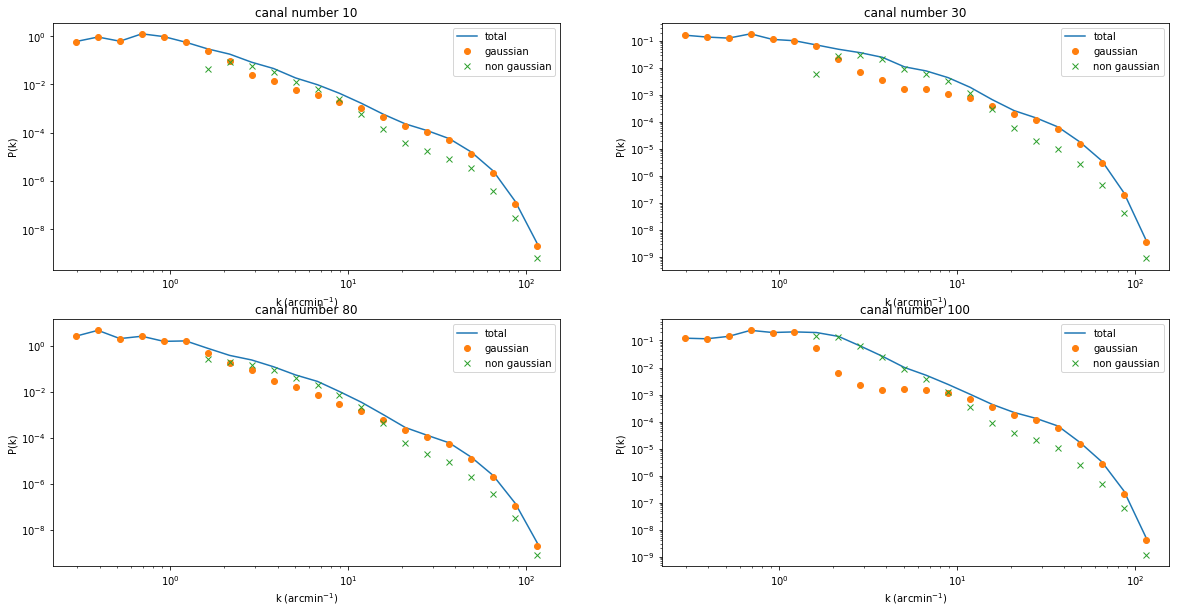

In [6]:
figure(figsize=(20,10))

subplot(2,2,1)
affiche(10)

subplot(2,2,2)
affiche(30)

subplot(2,2,3)
affiche(80)

subplot(2,2,4)
affiche(100)

In [31]:
from radio_beam import Beam  
Beam.from_fits_header(header)  

Beam: BMAJ=2.20154000000004 arcsec BMIN=1.8257640999998401 arcsec BPA=81.06638 deg